In [1]:
library(edgeR)

Loading required package: limma



In [1]:
library(edgeR)

Loading required package: limma



In [ ]:
#following tutorial here https://bioconductor.org/books/release/OSCA/multi-sample-comparisons.html#differential-abundance

In [52]:
major_celltype_props <- read.csv("compositional_analysis/major_cell_cluster_counts_by_sample.csv",row.names=1)
metadata_2 <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)
metadata_2$M.Number <- factor(metadata_2$M.Number)
metadata_2$monkey_condition_categories <- factor(metadata_2$monkey_condition_categories)
major_celltype_props <- na.omit(major_celltype_props)
major_celltype_props <- t(major_celltype_props)

metadata_2$M.Number <- factor(metadata_2$M.Number)
metadata_2$monkey_condition_categories <- factor(metadata_2$monkey_condition_categories)

In [107]:
rownames(major_celltype_props)

[1] "B.Cells"               "Endothelial"           "Fibroblasts"          
 [4] "Macrophages.Monocytes" "Mast"                  "Neutrophils"          
 [7] "Plasma.Cells"          "Secretory.Epithelial"  "T1P"                  
[10] "T2P"                   "T.NK"                  "cDC"                  
[13] "pDC"

In [114]:
props_no_tcells=major_celltype_props[!(row.names(major_celltype_props) %in% c("T.NK")),]


In [53]:

y.ab <- DGEList(major_celltype_props, samples=metadata_2)


In [96]:
design <- model.matrix(~factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [65]:
design <- model.matrix(~1 + factor(treatment), y.ab$samples)

In [97]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7882  0.7882  0.7882  0.7882  0.7882  0.7882 

In [99]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8913  0.8913  0.8913  0.8913  0.8913  0.8913 

In [101]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      2
NotSig                    7
Up                        4

In [102]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pDC,1.7491657,14.13874,11.043242,0.001905048,0.02077620
Mast,1.5025565,15.86520,9.127676,0.004364525,0.02077620
Plasma.Cells,1.6719252,14.48735,8.916743,0.004794509,0.02077620
B.Cells,1.6618831,15.16730,7.595762,0.008752969,0.02844715
Secretory.Epithelial,-3.4491599,11.20907,8.345303,0.011132015,0.02894324
T1P,-1.8365540,12.15945,5.929951,0.019415701,0.04206735
cDC,0.6387783,15.14641,4.763031,0.034924914,0.06486056
Macrophages.Monocytes,-0.6483051,18.68741,3.456048,0.070286425,0.11421544
T2P,-1.1375268,14.31892,2.018332,0.163121690,0.23562022


In [103]:
res <- glmQLFTest(fit.ab, coef = 5)

In [104]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       2
NotSig                     9
Up                         2

In [105]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pDC,2.1741525,14.13874,13.963581,0.0005795507,0.00753416
T1P,-2.2330899,12.15945,9.036282,0.0045455672,0.02954619
Secretory.Epithelial,-3.3179402,11.20907,8.566345,0.0103022352,0.03863681
cDC,0.7774541,15.14641,6.938284,0.0118882507,0.03863681
Mast,1.1209201,15.86520,5.736693,0.0213627410,0.05554313
Fibroblasts,-1.4230511,13.93294,3.995464,0.0524169280,0.10929489
B.Cells,1.2844561,15.16730,3.781250,0.0588510925,0.10929489
Endothelial,-0.8102104,14.11567,2.401419,0.1290644148,0.20972967
T2P,-1.1132809,14.31892,2.051946,0.1597439942,0.23074132


In [108]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [109]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 0
NotSig                                              13
Up                                                   0

In [110]:
res <- glmQLFTest(fit.ab, coef = 6)

In [105]:
summary(decideTests(res)) #IgG vs CD8a

       factor(treatment)IgG
Down                      2
NotSig                    7
Up                        4

In [106]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pDC,1.7491657,14.13874,11.043242,0.001905048,0.02077620
Mast,1.5025565,15.86520,9.127676,0.004364525,0.02077620
Plasma.Cells,1.6719252,14.48735,8.916743,0.004794509,0.02077620
B.Cells,1.6618831,15.16730,7.595762,0.008752969,0.02844715
Secretory.Epithelial,-3.4491599,11.20907,8.345303,0.011132015,0.02894324
T1P,-1.8365540,12.15945,5.929951,0.019415701,0.04206735
cDC,0.6387783,15.14641,4.763031,0.034924914,0.06486056
Macrophages.Monocytes,-0.6483051,18.68741,3.456048,0.070286425,0.11421544
T2P,-1.1375268,14.31892,2.018332,0.163121690,0.23562022


# remove t cells from proportions

In [115]:

y.ab <- DGEList(props_no_tcells, samples=metadata_2)


In [116]:
y.ab

,Array1_28918,Array1_29218,Array1_29318,Array1_29818,Array1_30518,Array2_28918,Array2_29218,Array2_29318,Array2_29818,Array2_30518,⋯,Array8_28818,Array8_29118,Array8_29618,Array8_30218,Array8_30418,Array9_28818,Array9_29118,Array9_29618,Array9_30218,Array9_30418
B.Cells,10,40,36,6,36,13,20,1,65,23,⋯,14,17,85,193,18,1,12,39,129,26
Endothelial,46,7,31,19,1,13,9,22,16,1,⋯,8,5,6,26,8,8,11,5,12,23
Fibroblasts,33,3,6,57,0,1,41,17,8,5,⋯,6,14,5,9,0,9,5,8,1,9
Macrophages.Monocytes,181,409,453,799,171,325,267,975,274,595,⋯,448,958,97,137,334,758,581,389,143,301
Mast,2,23,17,57,29,20,64,16,181,114,⋯,140,41,26,54,66,7,88,37,21,20
Neutrophils,35,0,35,1,6,0,4,0,0,0,⋯,1,1,1,2,0,0,1,1,11,1
Plasma.Cells,3,16,16,24,4,3,10,19,120,3,⋯,4,23,9,35,4,6,11,15,9,17
Secretory.Epithelial,2,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
T1P,13,0,3,0,1,4,0,13,1,2,⋯,0,0,4,2,0,0,0,5,0,1
T2P,0,2,26,19,5,4,2,267,20,18,⋯,2,20,0,16,2,30,46,1,10,6


In [91]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [117]:
design <- model.matrix(~0+factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [118]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8128  0.8128  0.8128  0.8128  0.8128  0.8128 

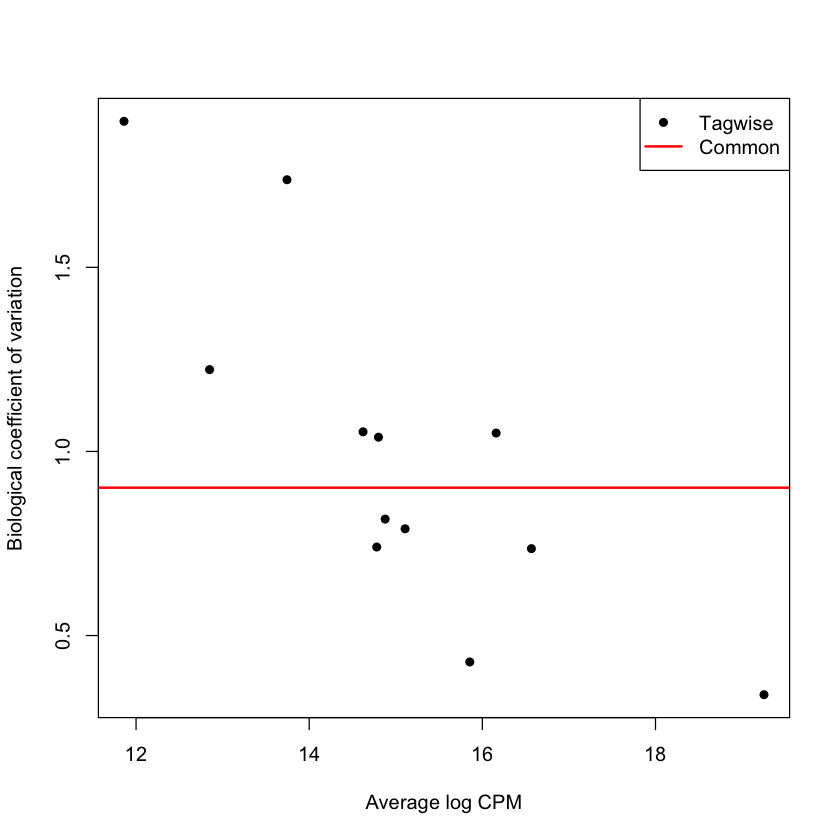

In [119]:
plotBCV(y.ab, cex=1)

In [120]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7383  0.7383  0.7383  0.7383  0.7383  0.7383 

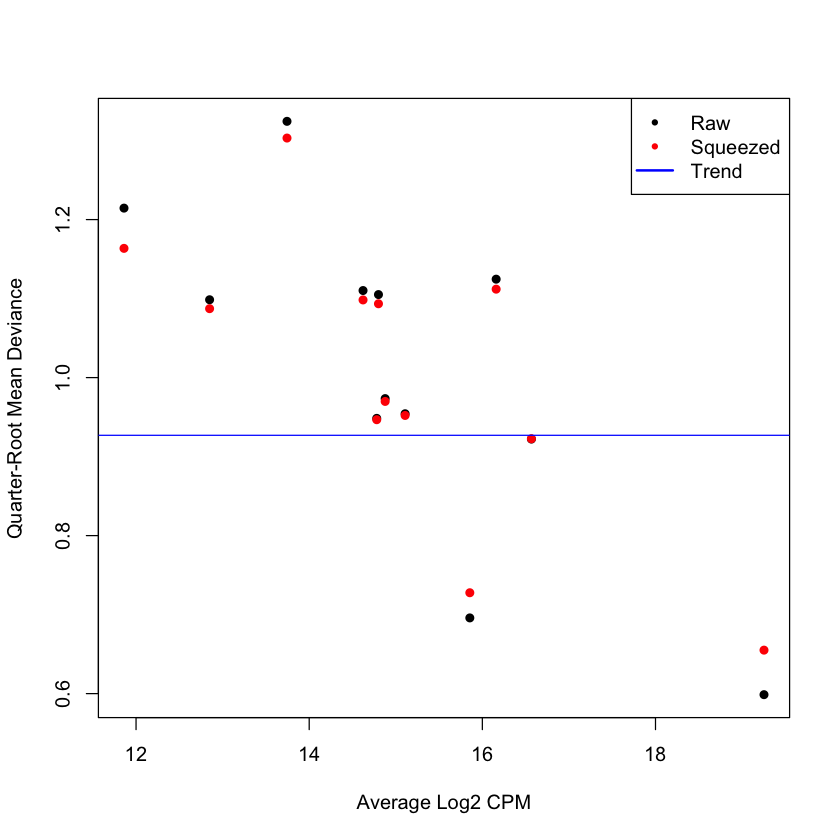

In [121]:
plotQLDisp(fit.ab, cex=1)

In [122]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      1
NotSig                    6
Up                        5

In [123]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pDC,1.8980108,14.78002,13.9122904,0.0006216318,0.007214854
Plasma.Cells,1.7830532,15.10785,12.2485818,0.0012024756,0.007214854
Mast,1.5148101,16.56676,9.9822880,0.0030903297,0.012361319
cDC,0.7548637,15.85529,6.9577808,0.0119741713,0.029320639
B.Cells,1.7892351,16.15946,6.9221391,0.0122169330,0.029320639
Secretory.Epithelial,-3.4917073,11.86088,7.1241792,0.0191621937,0.038324387
Macrophages.Monocytes,-0.4973358,19.25327,4.8209616,0.0342083068,0.058642812
T1P,-1.4561087,12.84958,3.4036965,0.0728285109,0.109242766
Endothelial,-0.5394923,14.87738,1.0389039,0.3145004764,0.419333969


In [124]:
res <- glmQLFTest(fit.ab, coef = 5)

In [125]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       2
NotSig                     7
Up                         3

In [126]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pDC,2.1286548,14.78002,14.209943,0.0005539053,0.006646864
T1P,-2.2161524,12.84958,7.893985,0.0077835820,0.032361162
cDC,0.8079923,15.85529,7.800867,0.0080902906,0.032361162
Secretory.Epithelial,-3.6499283,11.86088,8.628877,0.0114429104,0.034328731
Mast,1.1429792,16.56676,6.172193,0.0174835922,0.041960621
Fibroblasts,-1.5343691,14.62188,4.570779,0.0389919486,0.077983897
B.Cells,1.5849288,16.15946,4.239670,0.0463674431,0.079487045
Endothelial,-0.9431280,14.87738,2.923312,0.0954359655,0.143153948
Macrophages.Monocytes,-0.2796467,19.25327,1.534798,0.2228910651,0.297188087


In [127]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [128]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 0
NotSig                                              12
Up                                                   0

In [20]:
tnk_celltype_props <- read.csv("compositional_analysis/tcell_large_subcluster_counts_by_sample.csv",row.names=1)
metadata <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)

tnk_celltype_props <- na.omit(tnk_celltype_props)
tnk_celltype_props <- t(tnk_celltype_props)
metadata = metadata[colnames(tnk_celltype_props),]

metadata$M.Number <- factor(metadata$M.Number)
metadata$monkey_condition_categories <- factor(metadata$monkey_condition_categories)

In [21]:
y.ab <- DGEList(tnk_celltype_props, samples=metadata)



In [22]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [23]:
design <- model.matrix(~0+factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [24]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2767  0.2767  0.2767  0.2767  0.2767  0.2767 

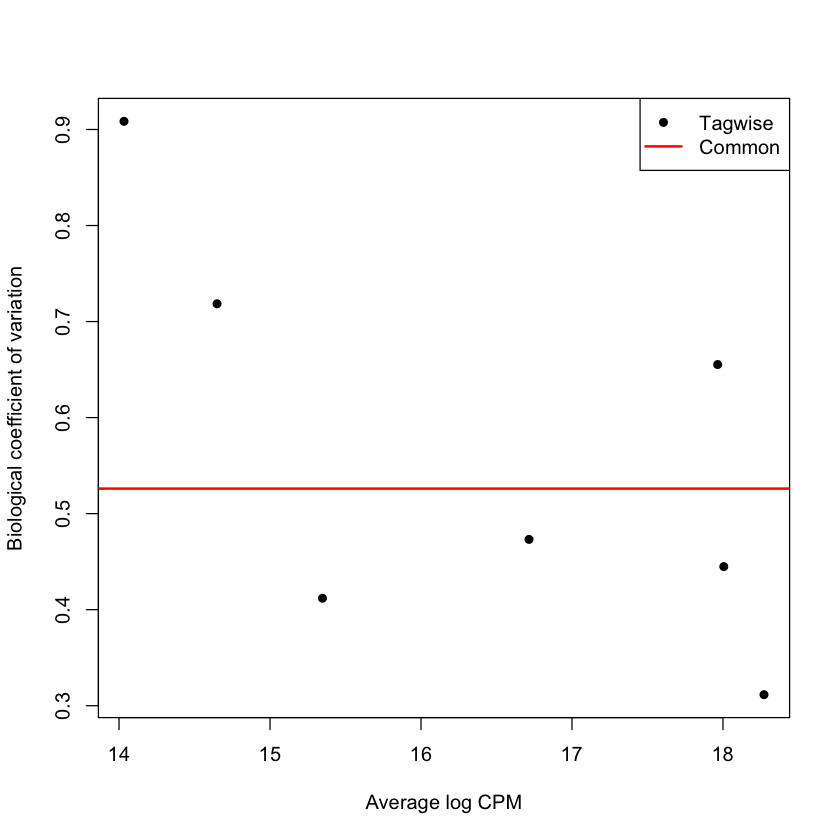

In [25]:
plotBCV(y.ab, cex=1)

In [26]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9397  0.9397  0.9397  0.9397  0.9397  0.9397 

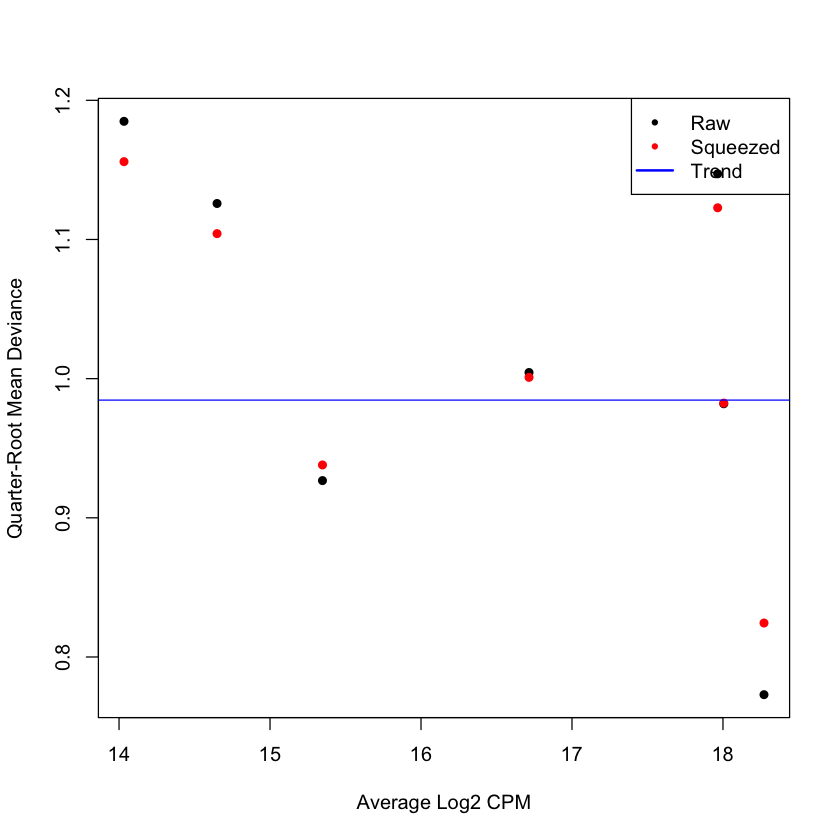

In [27]:
plotQLDisp(fit.ab, cex=1)

In [28]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      0
NotSig                    4
Up                        3

In [29]:
topTags(res,12)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Non.cytotoxic.CD8,3.6508329,14.64912,45.3358727,3.243809e-08,2.270667e-07
Stem.like,1.1318525,16.71542,11.8751368,1.289127e-03,4.511944e-03
Interferon.responding,1.8172521,14.03286,8.2318540,6.375022e-03,1.487505e-02
Proliferating.T.NK,-0.8946504,17.96495,4.8650581,3.283974e-02,5.746955e-02
Treg,0.6120690,15.34737,3.1847882,8.143383e-02,1.140074e-01
Cytotoxic.T.NK,-0.3310238,18.27175,2.3764899,1.305544e-01,1.523134e-01
T1T17,0.2092938,18.00529,0.4691195,4.970945e-01,4.970945e-01


In [30]:
res <- glmQLFTest(fit.ab, coef = 5)

In [31]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       1
NotSig                     3
Up                         3

In [32]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Treg,1.4022967,15.34737,16.290037804,0.000221099,0.001547693
Stem.like,0.9835416,16.71542,8.338434510,0.006070113,0.021245395
Cytotoxic.T.NK,-0.5182300,18.27175,5.723618765,0.021212447,0.037378253
T1T17,0.7350418,18.00529,5.709862503,0.021359002,0.037378253
Proliferating.T.NK,-0.7067484,17.96495,2.858036995,0.098208016,0.137491223
Non.cytotoxic.CD8,0.9842635,14.64912,2.392600407,0.129292200,0.150840900
Interferon.responding,0.0558757,14.03286,0.005887857,0.939194927,0.939194927


In [33]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [34]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 2
NotSig                                               4
Up                                                   1

In [35]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Non.cytotoxic.CD8,-2.6665694,14.64912,25.3656504,9.124524e-06,6.387167e-05
Interferon.responding,-1.7613764,14.03286,8.4934383,5.654031e-03,1.978911e-02
Treg,0.7902278,15.34737,5.9245627,1.919062e-02,4.477812e-02
T1T17,0.5257480,18.00529,2.7790128,1.028277e-01,1.799485e-01
Cytotoxic.T.NK,-0.1872062,18.27175,0.7355421,3.958818e-01,5.542345e-01
Proliferating.T.NK,0.1879021,17.96495,0.1991039,6.577001e-01,6.684136e-01
Stem.like,-0.1483109,16.71542,0.1860278,6.684136e-01,6.684136e-01


In [36]:
tnk_celltype_props <- read.csv("compositional_analysis/cytotoxic_subclusters.csv",row.names=1)
metadata <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)

tnk_celltype_props <- na.omit(tnk_celltype_props)
tnk_celltype_props <- t(tnk_celltype_props)
metadata = metadata[colnames(tnk_celltype_props),]

metadata$M.Number <- factor(metadata$M.Number)
metadata$monkey_condition_categories <- factor(metadata$monkey_condition_categories)

In [37]:
y.ab <- DGEList(tnk_celltype_props, samples=metadata)



In [38]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [39]:
design <- model.matrix(~0+factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [40]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3251  0.3251  0.3251  0.3251  0.3251  0.3251 

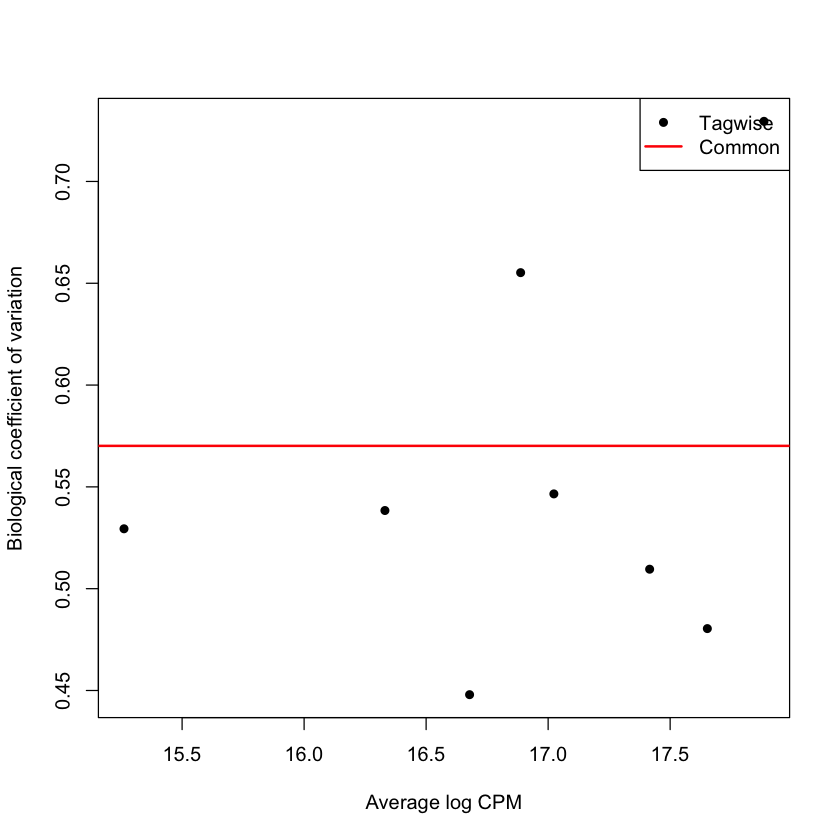

In [41]:
plotBCV(y.ab, cex=1)

In [42]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.011   1.011   1.011   1.011   1.011   1.011 

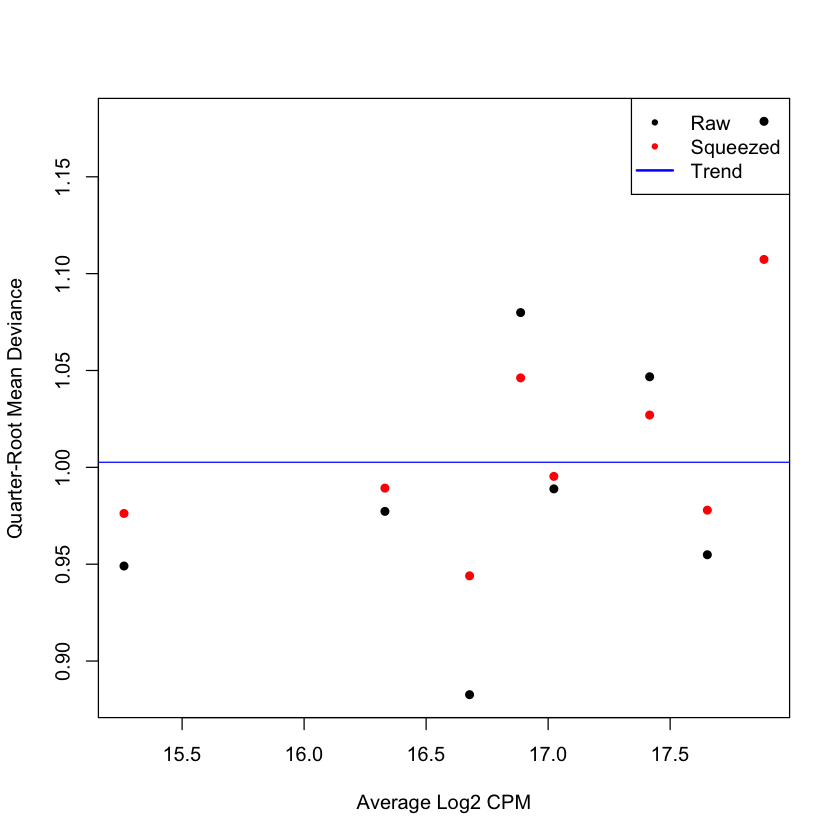

In [43]:
plotQLDisp(fit.ab, cex=1)

In [44]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      3
NotSig                    2
Up                        3

In [45]:
topTags(res,12)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytotoxic.6,4.3052612,15.26191,58.73352313,1.480407e-10,1.184325e-09
Cytotoxic.3,-3.1276923,17.02351,49.01032543,1.698441e-09,6.793765e-09
Cytotoxic.5,-3.3471303,16.88730,47.12008982,2.958232e-09,7.888618e-09
T1T17.like.Cytotoxic.7,-2.7387398,16.33119,38.61460177,4.080353e-08,8.160706e-08
Cytotoxic.1,2.4183986,17.41599,32.15425444,3.503687e-07,5.605900e-07
T1T17.like.Cytotoxic.8,1.5003395,17.88463,9.95494535,2.426561e-03,3.235415e-03
Cytotoxic.4,0.4546043,17.65244,1.58840958,2.120413e-01,2.423329e-01
Cytotoxic.2,0.1041961,16.67812,0.08308405,7.740742e-01,7.740742e-01


In [46]:
res <- glmQLFTest(fit.ab, coef = 5)

In [47]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       3
NotSig                     0
Up                         5

In [48]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytotoxic.5,-2.3147865,16.88730,26.139093,2.994144e-06,1.681235e-05
Cytotoxic.6,3.0920327,15.26191,25.447203,4.203088e-06,1.681235e-05
T1T17.like.Cytotoxic.7,-1.7368286,16.33119,17.522676,8.674163e-05,2.313110e-04
Cytotoxic.2,1.0628108,16.67812,8.841757,4.121850e-03,6.718644e-03
Cytotoxic.3,-1.1668541,17.02351,8.803196,4.199153e-03,6.718644e-03
T1T17.like.Cytotoxic.8,1.3063038,17.88463,7.235964,9.063379e-03,1.208450e-02
Cytotoxic.1,1.1337924,17.41599,6.820173,1.117206e-02,1.276806e-02
Cytotoxic.4,0.8539668,17.65244,5.308017,2.442076e-02,2.442076e-02


In [49]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [50]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 2
NotSig                                               4
Up                                                   2

In [51]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytotoxic.3,1.9608382,17.02351,18.3752971,6.106979e-05,0.0004885584
Cytotoxic.1,-1.2846062,17.41599,10.3089624,2.055482e-03,0.0082219289
Cytotoxic.6,-1.2132285,15.26191,7.1855827,9.393567e-03,0.0192849376
Cytotoxic.2,0.9586146,16.67812,7.1123757,9.642469e-03,0.0192849376
T1T17.like.Cytotoxic.7,1.0019112,16.33119,4.4112490,3.957154e-02,0.0633144668
Cytotoxic.5,1.0323439,16.88730,3.6487595,6.050687e-02,0.0806758242
Cytotoxic.4,0.3993626,17.65244,1.2600919,2.657466e-01,0.3037103579
T1T17.like.Cytotoxic.8,-0.1940356,17.88463,0.1686903,6.826238e-01,0.6826238031


In [ ]:
# T/NK including all subclusters

In [2]:
tnk_celltype_props <- read.csv("compositional_analysis/nkt_all_subcluster_counts_by_sample.csv",row.names=1)
metadata <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)

tnk_celltype_props <- na.omit(tnk_celltype_props)
tnk_celltype_props <- t(tnk_celltype_props)
metadata = metadata[colnames(tnk_celltype_props),]

metadata$M.Number <- factor(metadata$M.Number)
metadata$monkey_condition_categories <- factor(metadata$monkey_condition_categories)

In [3]:
y.ab <- DGEList(tnk_celltype_props, samples=metadata)



In [22]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [4]:
design <- model.matrix(~0+factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [5]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3658  0.3658  0.3658  0.3658  0.3658  0.3658 

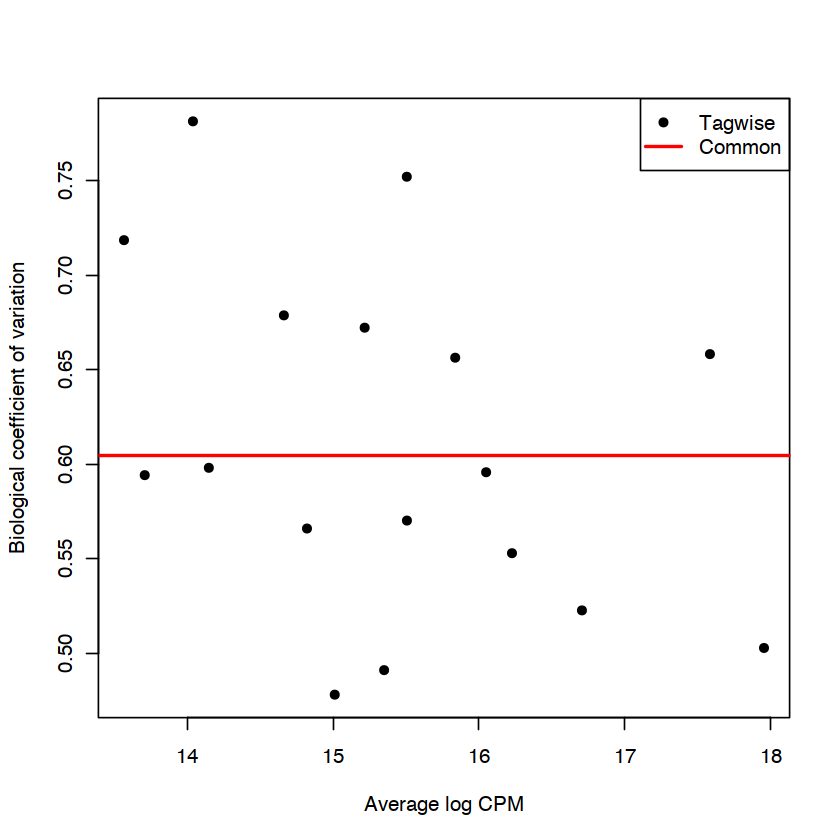

In [6]:
plotBCV(y.ab, cex=1)

In [7]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.114   1.114   1.114   1.114   1.114   1.114 

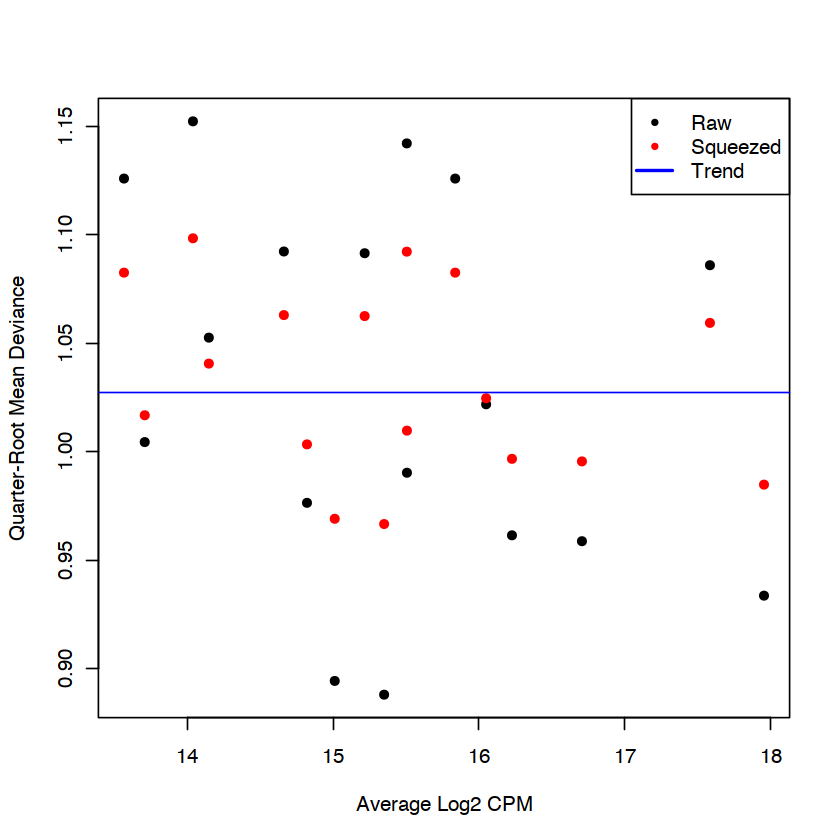

In [8]:
plotQLDisp(fit.ab, cex=1)

In [9]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      5
NotSig                    6
Up                        6

In [10]:
topTags(res,12)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytotoxic.4,-3.2896990,15.50659,48.181986,1.451859e-09,2.468161e-08
Cytotoxic.6,-3.6772674,15.50552,44.918205,5.311681e-09,3.723803e-08
Non.cytotoxic.CD8,3.6618264,14.66317,44.221802,6.571417e-09,3.723803e-08
T1T17.like.Cytotoxic.8,-2.9119497,14.82152,39.566483,2.224792e-08,8.190698e-08
Cytotoxic.5,3.9512569,13.70959,39.745899,2.409029e-08,8.190698e-08
Proliferating.Cytotoxic.4,-2.9107621,14.14890,25.867660,3.115877e-06,8.828318e-06
Cytotoxic.1,2.0904194,15.83731,17.972513,7.073392e-05,1.717824e-04
Proliferating.Cytotoxic.8,-2.6529343,13.56750,15.511707,1.991185e-04,4.231268e-04
Stem.like,1.1475649,16.70585,9.730983,2.610797e-03,4.931505e-03


In [11]:
res <- glmQLFTest(fit.ab, coef = 5)

In [12]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       5
NotSig                     9
Up                         3

In [13]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytotoxic.6,-2.9446981,15.50552,32.492068,2.978975e-07,5.064257e-06
T1T17.like.Cytotoxic.8,-2.1502001,14.82152,24.159735,5.439394e-06,4.623485e-05
Proliferating.Cytotoxic.8,-3.4066080,13.56750,21.412043,1.766335e-05,1.000923e-04
Cytotoxic.5,2.5287815,13.70959,13.687874,4.313720e-04,1.637856e-03
Cytotoxic.4,-1.5274822,15.50659,13.383283,4.817224e-04,1.637856e-03
Treg,1.3653825,15.35012,11.079716,1.381086e-03,3.913077e-03
Proliferating.Cytotoxic.4,-1.6327084,14.14890,9.588294,2.850570e-03,6.922812e-03
Stem.like,0.9854649,16.70585,6.671570,1.183967e-02,2.515929e-02
T1T17,0.7570118,17.95351,4.575965,3.583437e-02,6.768715e-02


In [14]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [15]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 4
NotSig                                              12
Up                                                   1

In [16]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Non.cytotoxic.CD8,-2.7057989,14.66317,24.387111,5.591237e-06,9.505103e-05
Cytotoxic.4,1.7622168,15.50659,13.338236,4.915597e-04,4.178258e-03
Cytotoxic.1,-1.4571888,15.83731,9.810121,2.580384e-03,1.462218e-02
Interferon.responding,-1.6973790,14.04001,8.191798,5.621630e-03,1.959821e-02
Cytotoxic.5,-1.4224754,13.70959,8.123996,5.764181e-03,1.959821e-02
Treg,0.7746541,15.35012,4.062167,4.760885e-02,1.176292e-01
Proliferating.Cytotoxic.4,1.2780537,14.14890,4.039772,4.843555e-02,1.176292e-01
Cytotoxic.2,0.7119113,15.01169,3.344416,7.159828e-02,1.521463e-01
T1T17,0.5588814,17.95351,2.367628,1.282833e-01,2.199297e-01


In [ ]:
# just proliferating subsets

In [18]:
tnk_celltype_props <- read.csv("compositional_analysis/nkt_all_subcluster_counts_by_sample.csv",row.names=1)
metadata <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)

tnk_celltype_props <- na.omit(tnk_celltype_props)
tnk_celltype_props <- t(tnk_celltype_props)[c("Proliferating.Cytotoxic.1.2.5.6","Proliferating.Cytotoxic.4","Proliferating.Cytotoxic.8","Proliferating.T1T17"),]
metadata = metadata[colnames(tnk_celltype_props),]

metadata$M.Number <- factor(metadata$M.Number)
metadata$monkey_condition_categories <- factor(metadata$monkey_condition_categories)

In [20]:
y.ab <- DGEList(tnk_celltype_props, samples=metadata)



In [22]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [21]:
design <- model.matrix(~0+factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [22]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
9.766e-05 9.766e-05 9.766e-05 9.766e-05 9.766e-05 9.766e-05 

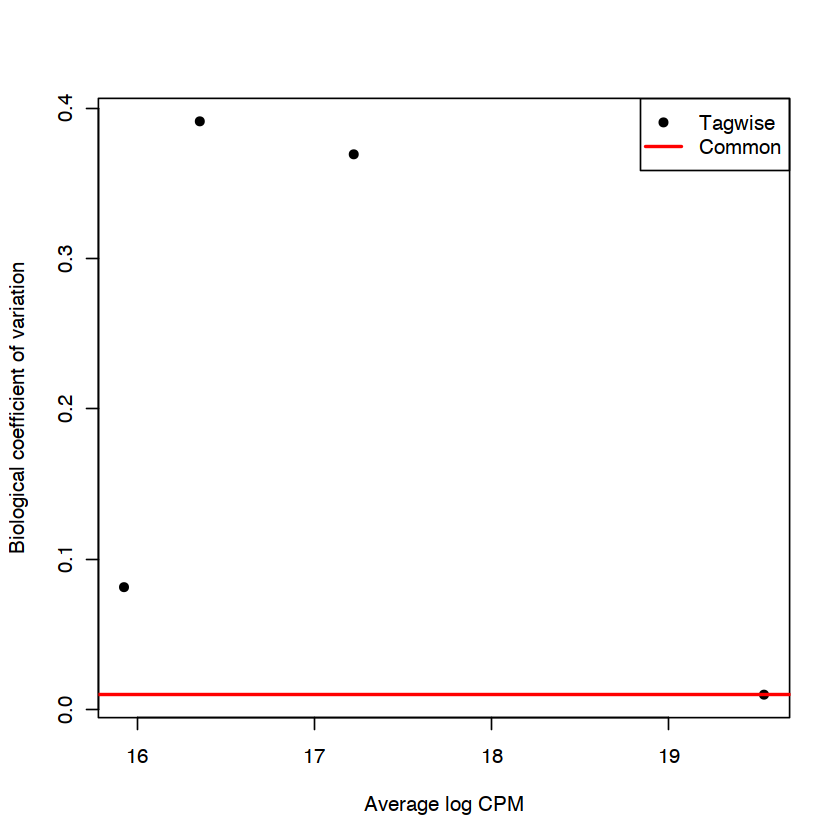

In [23]:
plotBCV(y.ab, cex=1)

In [24]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.313   1.313   1.313   1.313   1.313   1.313 

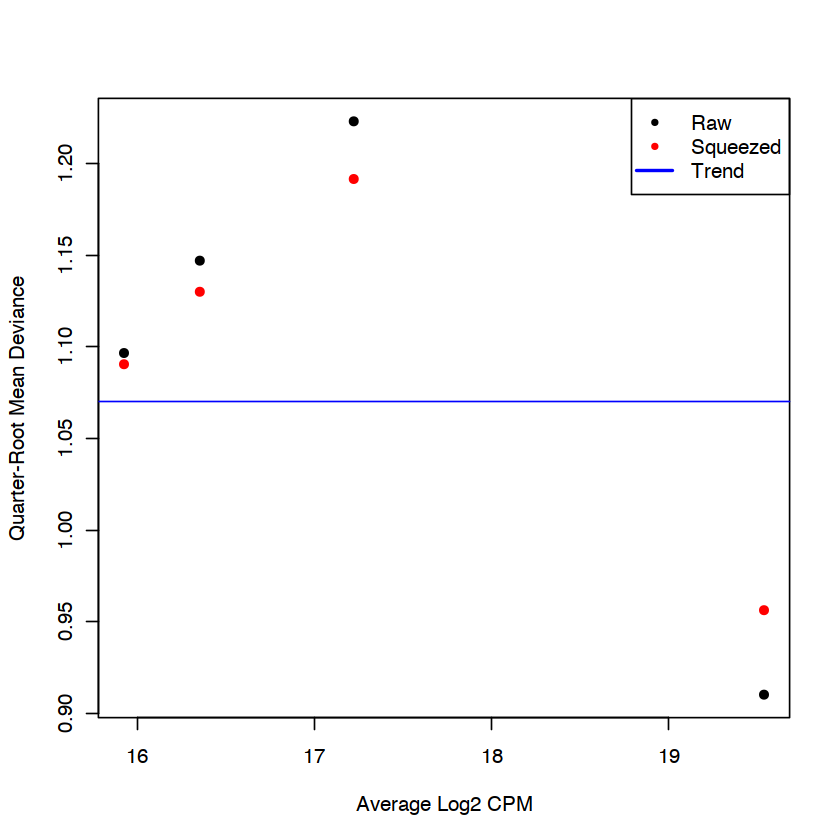

In [25]:
plotQLDisp(fit.ab, cex=1)

In [26]:
res <- glmQLFTest(fit.ab, coef=ncol(design))
summary(decideTests(res))

       factor(treatment)IgG
Down                      2
NotSig                    1
Up                        1

In [27]:
topTags(res,12)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Proliferating.Cytotoxic.4,-2.21694830,16.35294,24.008814840,1.227913e-05,4.911652e-05
Proliferating.Cytotoxic.8,-1.99636101,15.92515,19.041003697,7.162790e-05,1.432558e-04
Proliferating.T1T17,0.23633326,19.53731,9.626167676,4.440940e-03,5.921253e-03
Proliferating.Cytotoxic.1.2.5.6,0.01578089,17.22177,0.003216155,9.550208e-01,9.550208e-01


In [28]:
res <- glmQLFTest(fit.ab, coef = 5)

In [29]:
summary(decideTests(res)) # CD8b vs CD8a

       factor(treatment)CD8b
Down                       2
NotSig                     1
Up                         1

In [30]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Proliferating.Cytotoxic.8,-2.4879325,15.92515,19.768350,0.0000548172,0.0002192688
Proliferating.Cytotoxic.4,-1.3089309,16.35294,13.670519,0.0005787110,0.0011574220
Proliferating.T1T17,0.2668697,19.53731,12.060622,0.0014404001,0.0019205335
Proliferating.Cytotoxic.1.2.5.6,-0.3215005,17.22177,1.245766,0.2701563937,0.2701563937


In [31]:
res <- glmQLFTest(fit.ab, contrast = c(0,0,0,0,1,-1))

In [32]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 0
NotSig                                               4
Up                                                   0

In [33]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Proliferating.Cytotoxic.4,0.9080174,16.35294,2.5017422,0.1205693,0.4822773
Proliferating.Cytotoxic.1.2.5.6,-0.3372814,17.22177,1.0635147,0.3078042,0.6156084
Proliferating.Cytotoxic.8,-0.4915715,15.92515,0.4732605,0.4949439,0.6599252
Proliferating.T1T17,0.0305364,19.53731,0.1325201,0.7372464,0.7372464


In [ ]:
# MACROPHAGE CLUSTERS

In [52]:
major_celltype_props <- read.csv("compositional_analysis/mac_subcluster_counts.csv",row.names=1)
metadata_2 <- read.csv("compositional_analysis/metadata_by_sample.csv", row.names=1)
metadata_2$M.Number <- factor(metadata_2$M.Number)
metadata_2$monkey_condition_categories <- factor(metadata_2$monkey_condition_categories)
major_celltype_props <- na.omit(major_celltype_props)
major_celltype_props <- t(major_celltype_props)

metadata_2$M.Number <- factor(metadata_2$M.Number)
metadata_2$monkey_condition_categories <- factor(metadata_2$monkey_condition_categories)
metadata_2 <-metadata_2[colnames(major_celltype_props),]

In [53]:
major_celltype_props

,Array1_28918,Array1_29218,Array1_29318,Array1_29818,Array1_30518,Array2_28918,Array2_29218,Array2_29318,Array2_29818,Array2_30518,⋯,Array8_28818,Array8_29118,Array8_29618,Array8_30218,Array8_30418,Array9_28818,Array9_29118,Array9_29618,Array9_30218,Array9_30418
Alv.Mac,46,92,16,87,18,90,60,149,5,97,⋯,69,74,6,1,25,71,24,16,24,34
Inflam.Mac,1,53,127,163,47,20,27,148,95,68,⋯,49,306,33,65,45,141,154,75,67,88
Mac,19,112,144,435,74,171,89,573,85,371,⋯,278,416,32,28,221,459,323,222,29,149
Monocyte,115,141,153,69,26,39,83,71,74,32,⋯,37,116,25,41,38,20,54,57,21,26


In [54]:
rownames(major_celltype_props)

[1] "Alv.Mac"    "Inflam.Mac" "Mac"        "Monocyte"

In [55]:

y.ab <- DGEList(major_celltype_props, samples=metadata_2)


In [56]:
y.ab

An object of class "DGEList"
$counts
           Array1_28918 Array1_29218 Array1_29318 Array1_29818 Array1_30518
Alv.Mac              46           92           16           87           18
Inflam.Mac            1           53          127          163           47
Mac                  19          112          144          435           74
Monocyte            115          141          153           69           26
           Array2_28918 Array2_29218 Array2_29318 Array2_29818 Array2_30518
Alv.Mac              90           60          149            5           97
Inflam.Mac           20           27          148           95           68
Mac                 171           89          573           85          371
Monocyte             39           83           71           74           32
           Array3_28918 Array3_29218 Array3_29318 Array3_29818 Array3_30518
Alv.Mac              74           25           84           12           32
Inflam.Mac          294          175          150           33          161
Mac                 248          120          165           90          358
Monocyte             96          145          296           23           69
           Array4_28918 Array4_29218 Array4_29318 Array4_29818 Array4_30518
Alv.Mac              57           77           23            1           19
Inflam.Mac           95           59          103            7          196
Mac                 405           77          152           11          248
Monocyte             60          107           97            2           70
           Array5_28918 Array6_28818 Array6_29118 Array6_30218 Array6_30418
Alv.Mac              58           20           21            7            6
Inflam.Mac           75          117          272          144          179
Mac                 636          339          321           80          197
Monocyte             37          126          134           87           35
           Array7_28818 Array7_29118 Array7_29618 Array7_30218 Array7_30418
Alv.Mac              20           28            7           20           28
Inflam.Mac           35          328          147           56           71
Mac                  72          268           52           83          275
Monocyte             31          132           20           52           26
           Array8_28818 Array8_29118 Array8_29618 Array8_30218 Array8_30418
Alv.Mac              69           74            6            1           25
Inflam.Mac           49          306           33           65           45
Mac                 278          416           32           28          221
Monocyte             37          116           25           41           38
           Array9_28818 Array9_29118 Array9_29618 Array9_30218 Array9_30418
Alv.Mac              71           24           16           24           34
Inflam.Mac          141          154           75           67           88
Mac                 459          323          222           29          149
Monocyte             20           54           57           21           26

$samples
             group lib.size norm.factors M.Number treatment infection.dose
Array1_28918     1      181            1    28918      CD8a             19
Array1_29218     1      398            1    29218      CD8a             23
Array1_29318     1      440            1    29318      CD8a             18
Array1_29818     1      754            1    29818       IgG             23
Array1_30518     1      165            1    30518      CD8b             18
             Tissue.name CFU.granuloma total.thoracic.CFU Array lung.region
Array1_28918    RLL Gr 2           260            5301080     1         RLL
Array1_29218    LLL gr 3           390            2960670     1         LLL
Array1_29318       RUL C         59000           19228424     1         RUL
Array1_29818    ACC GR 1        610000            4066743     1         ACC
Array1_30518   RUL Gr 14          2025            3895065     1         RUL
       

In [57]:
#keep <- filterByExpr(y.ab, group=y.ab$samples$treatment)
#y.ab <- y.ab[keep,]
#summary(keep)

In [58]:
#design <- model.matrix(~factor(monkey_condition_categories) + factor(treatment), y.ab$samples)

In [68]:
design <- model.matrix(~0 + factor(treatment), y.ab$samples)

In [69]:
y.ab <- estimateDisp(y.ab, design, trend="none")
summary(y.ab$common.dispersion)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3131  0.3131  0.3131  0.3131  0.3131  0.3131 

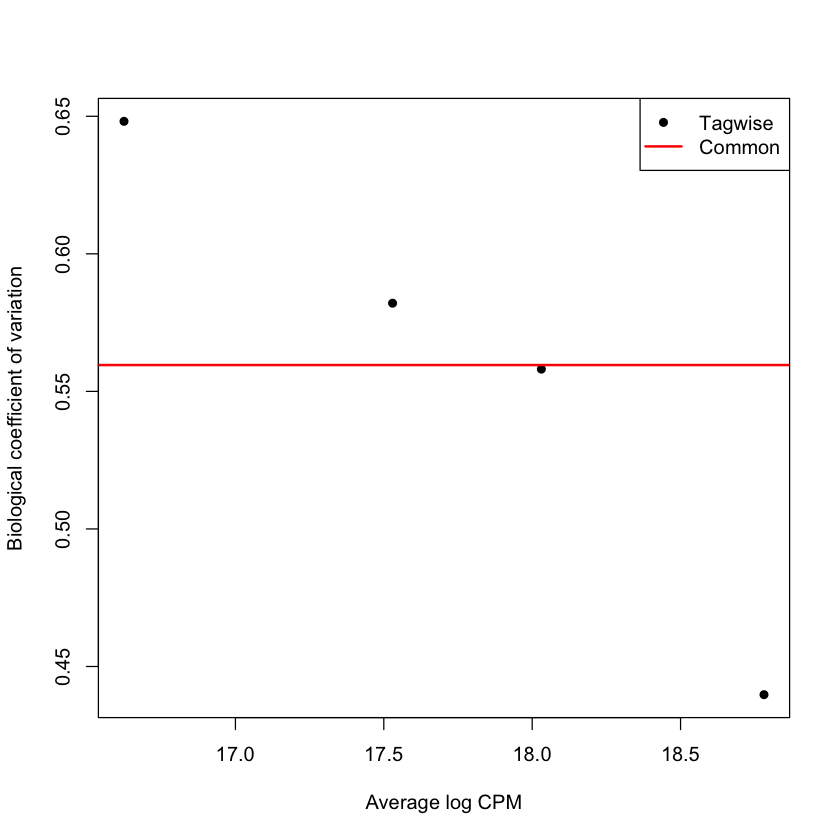

In [70]:
plotBCV(y.ab, cex=1)

In [71]:
fit.ab <- glmQLFit(y.ab, design, robust=TRUE, abundance.trend=FALSE)
summary(fit.ab$var.prior)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9531  0.9531  0.9531  0.9531  0.9531  0.9531 

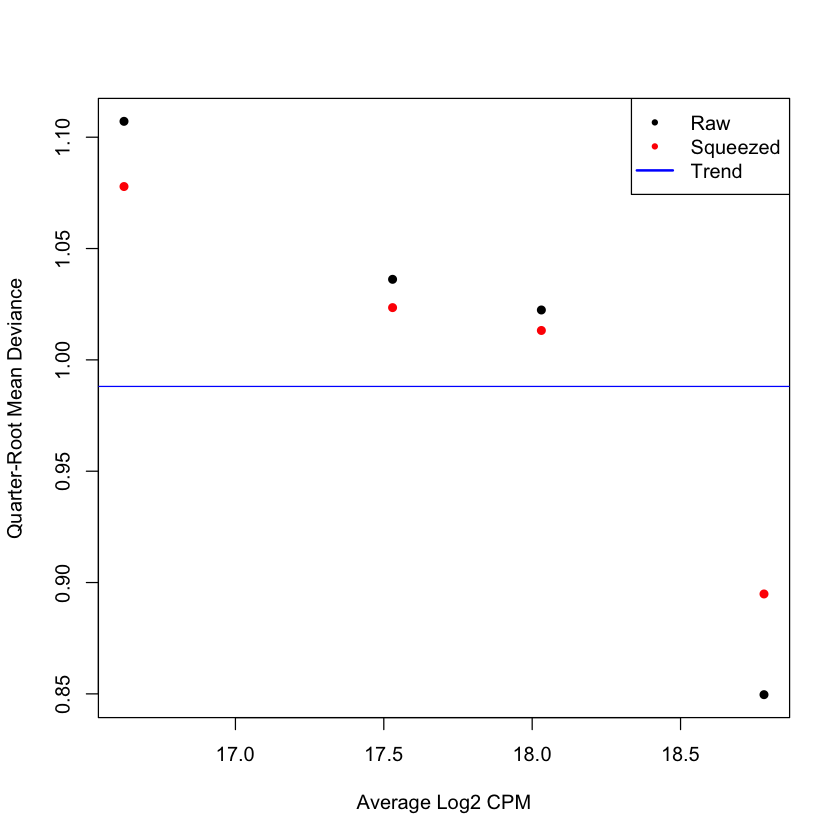

In [72]:
plotQLDisp(fit.ab, cex=1)

In [76]:
res <- glmQLFTest(fit.ab, contrast=c(1,-1,0))
summary(decideTests(res))

       1*factor(treatment)CD8a -1*factor(treatment)CD8b
Down                                                  0
NotSig                                                4
Up                                                    0

In [82]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alv.Mac,0.53130277,16.62451,1.53464615,0.2210600,0.7927024
Monocyte,0.26444240,17.52957,0.50099837,0.4822683,0.7927024
Mac,-0.11266772,18.78120,0.16896286,0.6827489,0.7927024
Inflam.Mac,-0.09406411,18.03095,0.06978987,0.7927024,0.7927024


In [77]:
res <- glmQLFTest(fit.ab, contrast=c(1,0,-1))

In [78]:
summary(decideTests(res)) # CD8b vs CD8a

       1*factor(treatment)CD8a -1*factor(treatment)IgG
Down                                                 0
NotSig                                               2
Up                                                   2

In [79]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alv.Mac,0.9891293,16.62451,6.010348,0.01766959,0.04686297
Monocyte,0.8207279,17.52957,5.457611,0.02343148,0.04686297
Inflam.Mac,-0.4093752,18.03095,1.571147,0.21572831,0.26271509
Mac,-0.2860261,18.78120,1.282445,0.26271509,0.26271509


In [80]:
res <- glmQLFTest(fit.ab, contrast=c(0,1,-1))

In [81]:
summary(decideTests(res)) # CD8b vs IgG

       1*factor(treatment)CD8b -1*factor(treatment)IgG
Down                                                 0
NotSig                                               4
Up                                                   0

In [49]:
res <- glmQLFTest(fit.ab,  coef = 6)

In [50]:
summary(decideTests(res)) #IgG vs CD8a

       factor(treatment)IgG
Down                      3
NotSig                    1
Up                        1

In [51]:
topTags(res)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inf.Mac,1.1503792,18.33521,12.648417,0.0009804507,0.004902254
CD16.MO,-1.6764240,16.01412,10.683568,0.0022187967,0.005546992
CD14..MO,-1.4184716,16.34509,7.486028,0.0092118407,0.015353068
Alv.Mac,-1.0972233,17.60552,6.064766,0.0181709296,0.022713662
Mac,0.4437221,18.34385,2.250149,0.1414162029,0.141416203
